In [64]:
import pandas as pd

In [65]:
data = pd.read_csv('heart.csv')

In [66]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [67]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [68]:
data_dup = data.duplicated().any()

In [69]:
data_dup

True

In [70]:
data = data.drop_duplicates()

In [71]:
data_dup = data.duplicated().any()

In [72]:
data_dup

False

In [73]:
#Data pre-processing

In [74]:
categorical_val = []
count_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        categorical_val.append(column)
    else:
        count_val.append(column)

In [75]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [76]:
count_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [77]:
#encoding

In [78]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [79]:
data['sex'].unique()

array([1, 0], dtype=int64)

In [80]:
data['restecg'].unique()

array([1, 0, 2], dtype=int64)

In [81]:
data['target'].unique()

array([0, 1], dtype=int64)

In [82]:
categorical_val.remove('sex')
categorical_val.remove('target')

data = pd.get_dummies(data, columns=categorical_val, drop_first=True)

In [83]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [84]:
#feature scaling

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
st = StandardScaler()
data[count_val] = st.fit_transform(data[count_val])

In [87]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [88]:
#splitting the dataset

In [89]:
X = data.drop('target', axis=1)

In [90]:
y = data['target']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [93]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


In [94]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [95]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,False,False,False,True,...,True,True,False,False,True,False,False,True,False,False
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [96]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [97]:
#applying logistic regression

In [98]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [119]:
from sklearn.metrics import accuracy_score

y_prediction = logistic.predict(X_test)

In [120]:
y_prediction

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [121]:
accuracy = accuracy_score(y_test, y_prediction)

print(f"Accuracy Score: {accuracy:.2f}")  # Display as a percentage with two decimal places

Accuracy Score: 0.79


In [122]:
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_prediction: {y_prediction.shape}")

Shape of X_test: (61, 22)
Shape of y_test: (61,)
Shape of y_prediction: (61,)


In [123]:
#Random forest classifier

In [124]:
data = pd.read_csv('heart.csv')

In [125]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [126]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [129]:
data.shape

(302, 14)

In [127]:
data = data.drop_duplicates()

In [128]:
data.shape

(302, 14)

In [130]:
X = data.drop('target', axis=1)
y = data['target']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [132]:
#applying the classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rf = RandomForestClassifier()

In [136]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [137]:
y_pred = rf.predict(X_test)

In [138]:
accuracy_score(y_test, y_pred)

0.8360655737704918

In [145]:
#Bar plot showing the accuracy of the two models

In [146]:
final_data  = pd.DataFrame({'Models':['LR', 'RF'], 'ACC':[accuracy_score(y_test, y_prediction),accuracy_score(y_test, y_pred)]})

In [147]:
final_data

,Models,ACC
0,LR,0.786885
1,RF,0.836066


In [148]:
import seaborn as sns

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20940\2426981653.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Models', y='ACC', data=final_data, palette='viridis')


<Axes: xlabel='Models', ylabel='ACC'>

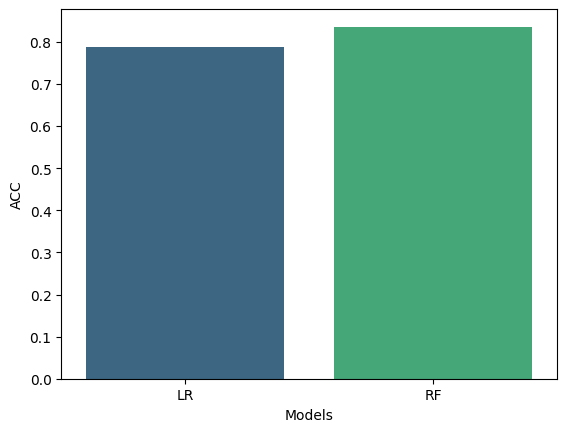

In [152]:
sns.barplot(x='Models', y='ACC', data=final_data, palette='viridis')

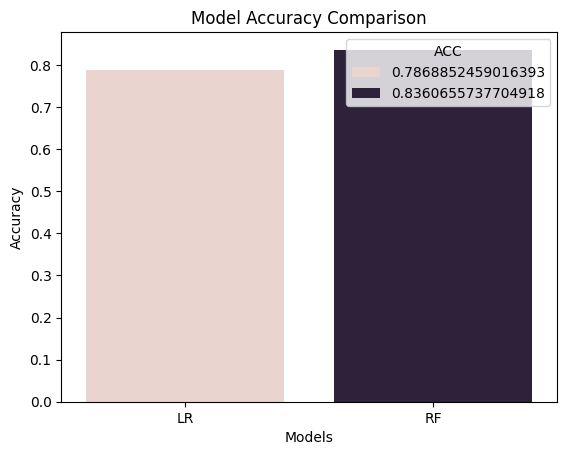

In [155]:
import matplotlib.pyplot as plt

sns.barplot(x='Models', y='ACC', data=final_data, hue='ACC', legend=True)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [156]:
#training Random Forest on the entire dataset

In [157]:
X = data.drop('target', axis=1)
y = data['target']

In [158]:
X.shape

(302, 13)

In [159]:
y.shape

(302,)

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rf = RandomForestClassifier()

In [164]:
rf.fit(X,y)

RandomForestClassifier()

In [165]:
#predictions on the new dataset

In [166]:
import pandas as pd

In [167]:
new_data = pd.DataFrame({'age':52,
                        'sex':1,
                        'cp':0,
                        'trestbps':125,
                        'chol':212,
                        'fbs':0,
                        'restecg':1,
                        'thallach':168,
                        'exang':0,
                        'oldpeak':1.0,
                        'slope':2,
                        'ca':2,
                        'thal':3,}, index=[0])

In [168]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thallach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [170]:
print("Training Data Features:", rf.feature_names_in_)  # Features used during training
print("New Data Features:", new_data.columns.tolist())  # Features in new_data


Training Data Features: ['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']
New Data Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thallach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [176]:
# Ensure new_data has the same features as the training data
expected_features = rf.feature_names_in_

# Add missing columns with default values
for col in expected_features:
    if col not in new_data:
        new_data[col] = 0  # Use a default value (adjust based on context)

# Remove unexpected columns
new_data = new_data[expected_features]

predictions = rf.predict(new_data)
if predictions == 0:
    print("No Disease")
else:
    print("Disease")
print("Predictions:", predictions)

No Disease
Predictions: [0]


In [177]:
#now saving the most suitable model using joblib

In [178]:
import joblib

In [179]:
joblib.dump(rf,'model_joblib_RF_heart')

['model_joblib_RF_heart']

In [180]:
model = joblib.load('model_joblib_RF_heart')

In [181]:
model.predict(new_data)

array([0], dtype=int64)

In [182]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [183]:
#creating a GUI

In [185]:
from tkinter import *
import joblib

In [186]:
import numpy as np
from sklearn import *

In [197]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = float(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    
    model = joblib.load('model_joblib_RF_heart')
    
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])

    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)

master = Tk()
master.title("Heart Disease Prediction System")

Label(master, text="Heart Disease Prediction System", bg='black', fg='white').grid(row=0, columnspan=2)

Label(master, text="Enter your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

Button(master, text='Predict', command=show_entry_fields).grid(row=14)

mainloop()